# How to create rotated grids

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

This corresponds to a regular grid for CAMS2_40 forecast

In [3]:
projection='rotated'
centre_lat = 51
centre_lon = 10
west_boundary = -35
south_boundary = -27
inc_rlat = 0.15
inc_rlon = 0.15

In [4]:
nessy = create_nes(comm=None, info=False, projection=projection,
                   centre_lat=centre_lat, centre_lon=centre_lon,
                   west_boundary=west_boundary, south_boundary=south_boundary,
                   inc_rlat=inc_rlat, inc_rlon=inc_rlon)

### Read projection

In [5]:
nessy.projection

Proj('+proj=ob_tran +o_proj=longlat +ellps=WGS84 +R=6356752.3142 +o_lat_p=39.0 +o_lon_p=-170.0', preserve_units=True)

In [6]:
nessy.projection_data

{'grid_mapping_name': 'rotated_latitude_longitude',
 'grid_north_pole_latitude': 39,
 'grid_north_pole_longitude': -170,
 'inc_rlat': 0.15,
 'inc_rlon': 0.15,
 'south_boundary': -27,
 'west_boundary': -35}

## 2. Plot

In [7]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-22.20657 16.25288, -22.08333 16.314..."
1,"POLYGON ((-22.08333 16.31491, -21.95995 16.376..."
2,"POLYGON ((-21.95995 16.37672, -21.83641 16.438..."
3,"POLYGON ((-21.83641 16.43832, -21.71271 16.499..."
4,"POLYGON ((-21.71271 16.49970, -21.58887 16.560..."
...,...
168582,"POLYGON ((87.40699 59.08029, 87.54350 58.96649..."
168583,"POLYGON ((87.54350 58.96649, 87.67937 58.85263..."
168584,"POLYGON ((87.67937 58.85263, 87.81461 58.73871..."


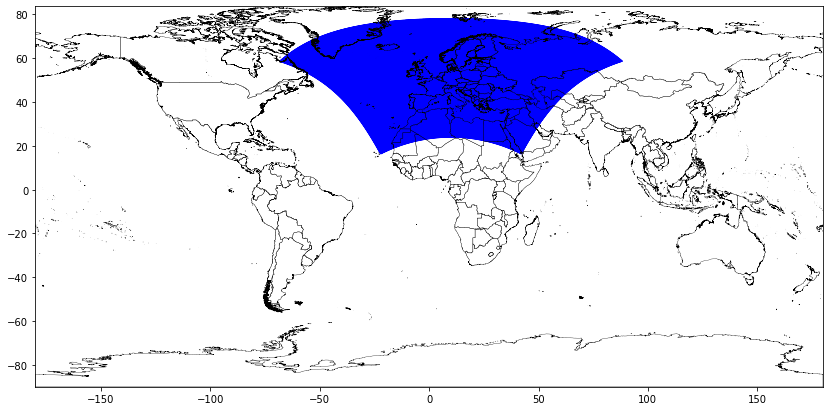

In [8]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor="blue", edgecolor="blue")
countries = gpd.read_file('/esarchive/shapefiles/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [9]:
nessy.to_netcdf('rotated_grid.nc', info=True)

Rank 000: Creating rotated_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [10]:
nessy.to_shapefile('rotated_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
